## Text Classification

This notebook demonstrates some basic NLP tasks for text analysis.

Before applying Machine Learning algorithms we should clean and pre-process the text data. We'll use popular pre-processing techniques we've used earlier:

* Text cleaning - removal of unnecessary characters like symbols, urls, emojis etc.

* Stopword removal - removal of words that don't convey any meaning to the machine

* Stemming - transforming derived words into the root words, thus reducing the feature space.

### Import Library and Explore data

In [1]:
import numpy as np
import pandas as pd
# Load the datasets
df = pd.read_csv("https://raw.githubusercontent.com/wongwara/Jobseeker_Baymax/main/dataset/listings2019_2022.csv")

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df.head()

,jobId,jobTitle,jobClassification,jobSubClassification,advertiserName,advertiserId,companyId,companyName,companyRating,listingDate,...,Haskell,Lisp,Golang,Spark,Javascript,F.,Fortran,first_seen,last_seen,recruiter
0,38098375,Senior Method Development Immunoassay Scientis...,Science & Technology,Biological & Biomedical Sciences,Hobson Prior Australia,30969882,NaN,NaN,NaN,2019-01-16 12:17:41,...,0,0,0,0,0,0,0,2019-03-06,2019-03-11,1
1,38259053,Pricing Data Scientist - Lower North Shore,Information & Communication Technology,Other,Randstad - Technologies,26537413,NaN,NaN,NaN,2019-02-04 13:02:22,...,0,0,0,0,0,0,0,2019-03-06,2019-03-06,1
2,38267899,Insights Analyst – Online Video Streaming,Information & Communication Technology,Database Development & Administration,Aurec,39407892,NaN,NaN,NaN,2019-02-05 11:33:08,...,0,0,0,0,0,0,0,2019-03-06,2019-03-07,1
3,38267995,Credit Risk Analyst,Banking & Financial Services,Compliance & Risk,Huxley Associates,26057722,NaN,NaN,NaN,2019-02-05 11:39:26,...,0,0,0,0,0,0,0,2019-03-06,2019-03-07,1
4,38269206,Data Scientist,Information & Communication Technology,Database Development & Administration,FinXL IT Professional Services,33086778,NaN,NaN,NaN,2019-02-05 12:54:11,...,0,0,0,0,0,0,0,2019-03-06,2019-03-07,0


In [4]:
df.tail(5)

,jobId,jobTitle,jobClassification,jobSubClassification,advertiserName,advertiserId,companyId,companyName,companyRating,listingDate,...,Haskell,Lisp,Golang,Spark,Javascript,F.,Fortran,first_seen,last_seen,recruiter
3897,55690796,Data Scientist | Closes 31 Jan | Citizenship r...,Information & Communication Technology,Consultants,Continuum Recruitment,35055316,NaN,NaN,NaN,2022-01-25 09:45:42,...,0,0,0,0,0,0,0,2022-01-24,2022-01-25,1
3898,55693999,Senior Data Scientist,Information & Communication Technology,Business/Systems Analysts,Toyota Finance Australia,39087537,786348.0,Toyota Financial Services,3.0,2022-01-25 12:01:05,...,0,0,0,0,0,0,0,2022-01-25,2022-01-25,0
3899,55698692,Data Scientist (Several),Information & Communication Technology,Other,Effective People,36422607,NaN,NaN,NaN,2022-01-25 15:15:39,...,0,0,0,0,0,0,0,2022-01-25,2022-01-25,0
3900,55700971,Machine Learning Data Scientist (PHD),Science & Technology,"Mathematics, Statistics & Information Sciences",Susquehanna Pacific Pty Ltd,20351243,NaN,NaN,NaN,2022-01-25 16:55:13,...,0,0,0,0,0,0,0,2022-01-25,2022-01-25,0
3901,55701106,Data Scientist,Science & Technology,"Mathematics, Statistics & Information Sciences",Valrose,39090289,NaN,NaN,NaN,2022-01-25 17:00:57,...,0,0,0,0,0,0,0,2022-01-25,2022-01-25,1


# Text Cleaning

## Dealing with Punctuation, Numbers and Stopwords: NLTK and regular expressions

The four columns are called "jobTitle", "teaser", "mobileAdTemplate" and "desktopAdTemplate"

In [5]:
import re 
# Define pipeline function to perform multiple cleaning steps on a given text
def clean_text(text):
    text = re.sub(r'[^\w]', ' ', str(text)) # Remove symbols
    text = re.sub(r'[ ]{2,}', ' ', str(text)) # Remove extra spaces
    text = re.sub(r'[ \t]+$', '', str(text)) # Remove trailing white spaces
    text = re.sub(r'\s+', ' ', text) # Remove newline (\n)
    text = re.sub(r"\'", "", text) # Remove quotes
    return text

In [6]:
# "jobTitle", "teaser", "mobileAdTemplate" and "desktopAdTemplate"
df["jobTitle_cleaned"] = df["jobTitle"].apply(clean_text)
df["teaser_cleaned"] = df["teaser"].apply(clean_text)
df["mobileAdTemplate_cleaned"] = df["mobileAdTemplate"].apply(clean_text)
df["desktopAdTemplate_cleaned"] = df["desktopAdTemplate"].apply(clean_text)

In [7]:
df["jobTitle_cleaned"] = df["jobTitle_cleaned"].str.lower()
df["teaser_cleaned"] = df["teaser_cleaned"].str.lower()
df["mobileAdTemplate_cleaned"] = df["mobileAdTemplate_cleaned"].str.lower()
df["desktopAdTemplate_cleaned"] = df["desktopAdTemplate_cleaned"].str.lower()

In [8]:
from nltk.corpus import stopwords

In [9]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
    useful_words = []
    for i in text.split():
        if i.strip().lower() not in stop_words:
            useful_words.append(i.strip())
    return " ".join(useful_words)

In [10]:
df["jobTitle_cleaned"] = df["jobTitle_cleaned"].apply(remove_stopwords)
df["teaser_cleaned"] = df["teaser_cleaned"].apply(remove_stopwords)
df["mobileAdTemplate_cleaned"] = df["mobileAdTemplate_cleaned"].apply(remove_stopwords)
df["desktopAdTemplate_cleaned"] = df["desktopAdTemplate_cleaned"].apply(remove_stopwords)

In [11]:
# Convert to string
text_title = df["jobTitle_cleaned"].to_string()
text_teaser = df["teaser_cleaned"].to_string()
text_mobile = df["mobileAdTemplate_cleaned"].to_string()
text_desktop = df["desktopAdTemplate_cleaned"].to_string()

In [12]:
from nltk.tokenize import word_tokenize #Tokenizing a sentence (breaking it into individual “words”) 
from nltk.stem import PorterStemmer

# Using the Porter Stemmer
# allows us to remove the prefixes, suffixes from a word and and change it to its base form
porter = PorterStemmer()
text_title = porter.stem(text_title)
text_teaser = porter.stem(text_teaser)

In [13]:
text_mobile = porter.stem(text_mobile)
text_desktop = porter.stem(text_desktop)

In [14]:
text_title = word_tokenize(text_title)
text_teaser = word_tokenize(text_teaser)
text_mobile = word_tokenize(text_mobile)
text_desktop = word_tokenize(text_desktop)

Note: Both stemming and lemmatization shrink the vocabulary space. Creating the stem or lemma "run" by combining the words "running," "runner," and "runs." The fundamental type of inflected words are produced by both stemming and lemmatization; the only difference is that stem may or may not be an actual word, whereas lemma is an actual language term. Stemming employs an algorithm to perform steps on words, making it faster.

The below table is our data set after we cleaned it.

In [15]:
df.sample(5)

,jobId,jobTitle,jobClassification,jobSubClassification,advertiserName,advertiserId,companyId,companyName,companyRating,listingDate,...,Javascript,F.,Fortran,first_seen,last_seen,recruiter,jobTitle_cleaned,teaser_cleaned,mobileAdTemplate_cleaned,desktopAdTemplate_cleaned
1119,40209806,Data Scientist,Information & Communication Technology,Database Development & Administration,Evergen,34665346,NaN,NaN,NaN,2019-10-21 15:26:01,...,0,0,0,2019-10-21,2019-11-20,0,data scientist,evergen data scientist well backed 4 year old ...,evergen data scientist well backed 4 year old ...,nan
3699,55200537,Data Scientist,Education & Training,Other,La Trobe University,20522766,432458.0,La Trobe University,3.1000,2021-12-01 17:15:47,...,0,0,0,2021-12-01,2021-12-03,0,data scientist,nan,full time continuing located melbourne bundoor...,full time continuing located melbourne bundoor...
2777,52693435,Principle Data Scientist,Information & Communication Technology,Architects,Coles,21742758,433124.0,Coles Group,2.9419,2021-06-25 16:00:07,...,0,0,0,2021-06-25,2021-07-09,0,principle data scientist,working across entire advanced analytics team ...,coles supermarkets hawthorn east requisition i...,coles supermarkets hawthorn east requisition i...
1643,50030828,Data Scientist Practice Lead - Brisbane,Information & Communication Technology,Architects,Talenza,37849505,NaN,NaN,NaN,2020-06-01 13:41:20,...,0,0,0,2020-06-01,2020-07-01,1,data scientist practice lead brisbane,data scientist able guide strategy provide tho...,senior data scientist data scientist lead need...,data scientist practice lead brisbane senior d...
635,39240169,Data Scientist,Information & Communication Technology,Engineering - Software,Accenture,18398410,NaN,Accenture,NaN,2019-06-13 12:28:15,...,0,0,0,2019-06-13,2019-07-13,0,data scientist,unleash power digital drive growth create new ...,flexible work arrangements meet needs work lea...,data scientist flexible work arrangements meet...


In [16]:
# Sample of what is inside the text_tokenizer list
import random
random.sample(text_title,10)

['senior',
 'data',
 'data',
 'senior',
 '1314',
 'scientist',
 'model',
 'cloud',
 '2612',
 'senior']

In [17]:
random.sample(text_mobile,10)

['financial',
 'management',
 'consultancy',
 'looking',
 '1054',
 'rolethis',
 'analyse',
 'sa',
 '1099',
 '...']

The four columns are called "jobTitle", "teaser", "mobileAdTemplate" and "desktopAdTemplate" Now that you've read the data set, take a look at a few jobTitle:

It can be seen that there are still numeric characters in the list. We have to remove it.

In [18]:
# Remove numeric characters using regex and list comprehension
text_title = [re.sub(r'\d+', '', title) for title in text_title if title]
# Print the result
print(text_title)

['', 'senior', 'method', 'development', 'immunoassay', 'scientis', '...', '', 'pricing', 'data', 'scientist', 'lower', 'north', 'shore', '', 'insights', 'analyst', 'online', 'video', 'streaming', '', 'credit', 'risk', 'analyst', '', 'data', 'scientist', '', 'data', 'scientist', '', 'data', 'scientist', '', 'data', 'scientist', '', 'senior', 'data', 'scientist', '', 'data', 'scientist', '', 'postdoctoral', 'fellow', '', 'postdoctoral', 'fellow', '', 'data', 'scientist', '', 'data', 'scientist', '', 'data', 'scientist', 'higher', 'education', '', 'data', 'scientist', '', 'data', 'scientist', '', 'data', 'science', 'management', 'consultant', '', 'data', 'engineer', 'big', 'data', '', 'data', 'scientist', '', 'data', 'scientist', '', 'senior', 'data', 'scientist', '', 'data', 'analyst', 'scientist', '', 'data', 'analyst', 'data', 'scientist', '', 'data', 'science', 'manager', '', 'data', 'administrator', 'data', 'engineer', '', 'data', 'scientist', 'sponsorship', 'available', '', 'data', 

In [19]:
random.sample(text_title,10)

['',
 'anywhere',
 'data',
 'data',
 'scientist',
 'a',
 'principal',
 'data',
 'scientist',
 'data']

Now the list in text_title is free of numeric characters and white space. We will do the same in the other three features.

In [20]:
text_teaser = [re.sub(r'\d+', '', title) for title in text_teaser if title]

In [21]:
random.sample(text_teaser,10)

['software',
 '...',
 '',
 'support',
 'mode',
 'looking',
 '...',
 'touch',
 'darta',
 '']

In [22]:
text_mobile = [re.sub(r'\d+', '', title) for title in text_mobile if title]

In [23]:
random.sample(text_mobile,10)

['...',
 'leading',
 '',
 'senior',
 '...',
 'organisation',
 'vincent',
 'me',
 '',
 'supportive']

In [24]:
text_desktop = [re.sub(r'\d+', '', title) for title in text_desktop if title]

In [25]:
random.sample(text_desktop,10)

['use',
 'reserve',
 'data',
 'lead',
 'scientist',
 '',
 'data',
 'learning',
 'interoperabilit',
 'joining']

# Text Analysis

After we pre-processed the 4 columns of text data above, we will now analyse the data using advanced text processing for each feature including length of words, Bag of Words, N-grams, TF-IDF, and Word Embeddings.

## Length of words

In this step, we will see the word counts in each column before stemming and tokenization.

In [26]:
df['jobTitle_word_count'] = df['jobTitle_cleaned'].apply(lambda x: len(str(x).split(" ")))
df['teaser_word_count'] = df['teaser_cleaned'].apply(lambda x: len(str(x).split(" ")))
df['mobileAdTemplate_word_count'] = df['mobileAdTemplate_cleaned'].apply(lambda x: len(str(x).split(" ")))
df['desktopAdTemplate_word_count'] = df['desktopAdTemplate_cleaned'].apply(lambda x: len(str(x).split(" ")))
df[['jobTitle_word_count','teaser_word_count', 'mobileAdTemplate_word_count', 'desktopAdTemplate_word_count']].sample(5)

,jobTitle_word_count,teaser_word_count,mobileAdTemplate_word_count,desktopAdTemplate_word_count
3432,2,1,251,251
2217,3,10,436,439
994,2,14,223,225
1130,2,15,418,437
586,2,9,213,223


In [27]:
df[['jobTitle_word_count','teaser_word_count', 'mobileAdTemplate_word_count', 'desktopAdTemplate_word_count']].describe()

,jobTitle_word_count,teaser_word_count,mobileAdTemplate_word_count,desktopAdTemplate_word_count
count,3902.000000,3902.000000,3902.000000,3902.000000
mean,3.360328,10.818298,288.189390,246.819323
std,1.696641,4.954812,143.423349,174.265753
min,2.000000,1.000000,1.000000,1.000000
25%,2.000000,9.000000,183.000000,137.000000
50%,3.000000,12.000000,264.000000,238.000000
75%,4.000000,14.000000,374.000000,355.000000
max,12.000000,22.000000,1121.000000,1121.000000


It can be seen by the means of each feature. The length of the job title that companies input is around 3.4 words, which means the addition or extra words that go with the word data scientist are about 1.4 words. The length of the teaser is around 10.8 words, while the two ads, both on desktop and mobile, are close to each other at around 250 words.

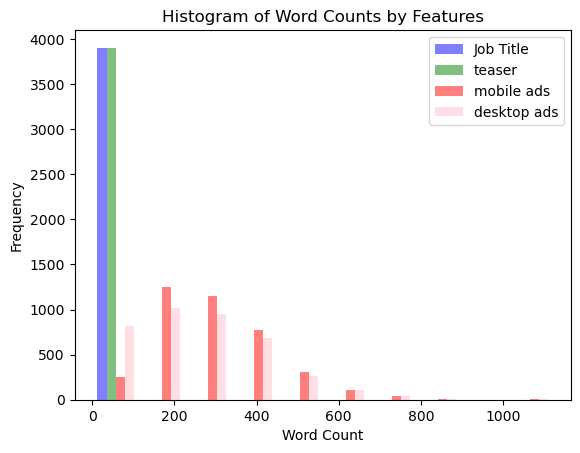

In [28]:
import matplotlib.pyplot as plt

# Create a histogram with four features
plt.hist([df['jobTitle_word_count'], df['teaser_word_count'], df['mobileAdTemplate_word_count'], df['desktopAdTemplate_word_count']],
         bins=10, color=['blue', 'green', 'red', 'pink'], alpha=0.5,
         label=['Job Title', 'teaser', 'mobile ads', 'desktop ads'])

# Set axis labels, title, and legend
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts by Features')
plt.legend(loc='upper right')

# Display the histogram
plt.show()

## Bag of Words

After tokenizing the text data, we will calculate the frequency count of each word in the bag of words model and see the top 10 most frequent words.

### 1.  BoW for Job Title

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create the bag of words model
cv = CountVectorizer()
bow = cv.fit_transform(text_title)

# Get the list of features (i.e., words) in the bag of words model
features = cv.get_feature_names_out()

# Get the frequency count of each word in the bag of words model
word_counts = bow.toarray().sum(axis=0)

# Combine the features and their corresponding word counts into a dataframe
word_counts_df = pd.DataFrame({"word": features, "count": word_counts})

# Sort the dataframe by word count in descending order
word_counts_df = word_counts_df.sort_values("count", ascending=False)

# Print the top 10 most frequent words
print(word_counts_df.head(10))


          word  count
169       data   3717
612  scientist   3193
617     senior    737
34     analyst    312
222   engineer    219
378       lead    153
39   analytics    114
371     junior     94
383   learning     88
405    machine     85


### 2. BoW for Teaser

In [30]:
# Create the bag of words model
cv = CountVectorizer()
bow = cv.fit_transform(text_teaser)

# Get the list of features (i.e., words) in the bag of words model
features = cv.get_feature_names_out()

# Get the frequency count of each word in the bag of words model
word_counts = bow.toarray().sum(axis=0)

# Combine the features and their corresponding word counts into a dataframe
word_counts_df = pd.DataFrame({"word": features, "count": word_counts})

# Sort the dataframe by word count in descending order
word_counts_df = word_counts_df.sort_values("count", ascending=False)

# Print the top 10 most frequent words
print(word_counts_df.head(10))

             word  count
582          data   1944
1971    scientist    891
1497          nan    528
1574  opportunity    442
1252         join    431
1345      looking    331
2215         team    286
1989      seeking    272
109     analytics    260
2419         work    243


### 3. BoW for Mobile Ads

In [31]:
# Create the bag of words model
cv = CountVectorizer()
bow = cv.fit_transform(text_mobile)

# Get the list of features (i.e., words) in the bag of words model
features = cv.get_feature_names_out()

# Get the frequency count of each word in the bag of words model
word_counts = bow.toarray().sum(axis=0)

# Combine the features and their corresponding word counts into a dataframe
word_counts_df = pd.DataFrame({"word": features, "count": word_counts})

# Sort the dataframe by word count in descending order
word_counts_df = word_counts_df.sort_values("count", ascending=False)

# Print the top 10 most frequent words
print(word_counts_df.head(10))

             word  count
752          data   1350
2529    scientist    704
519        client    414
2015  opportunity    325
583       company    316
1706      looking    305
2470         role    300
1636      leading    246
1577         join    223
239     australia    208


### 4. BoW for Desktop Ads

In [32]:
# Create the bag of words model
cv = CountVectorizer()
bow = cv.fit_transform(text_desktop)

# Get the list of features (i.e., words) in the bag of words model
features = cv.get_feature_names_out()

# Get the frequency count of each word in the bag of words model
word_counts = bow.toarray().sum(axis=0)

# Combine the features and their corresponding word counts into a dataframe
word_counts_df = pd.DataFrame({"word": features, "count": word_counts})

# Sort the dataframe by word count in descending order
word_counts_df = word_counts_df.sort_values("count", ascending=False)

# Print the top 10 most frequent words
print(word_counts_df.head(10))

             word  count
573          data   2431
2034    scientist   1808
1517          nan    695
2076       senior    377
387        client    245
436       company    227
1983         role    218
1607  opportunity    197
168    australian    160
1367      looking    159


For all the bags of words in each feature, the top two most frequent words are data and scientist. What's interesting is the following sequence of words, which are around third and fourth place.

Both the job title and desktop ads talk frequently about 'senior', while the job teaser and mobile ads talk about 'opportunity'.

## N-grams

In this experiment, we will use bigrams(N=2) to see the words that used or came together in the text.

### 1. Bigrams for Job Title

In [33]:
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder


# Initialize the bigram collocation finder with the tokens
finder = BigramCollocationFinder.from_words(text_title)

# Define the scoring metric for bigrams
bigram_measures = BigramAssocMeasures()

# Find the top 10 bigrams using the chi-squared measure
top_bigrams = finder.nbest(bigram_measures.chi_sq, 10)

# Print the top bigrams
print(top_bigrams)


[('address', 'register'), ('applicants', 'welcome'), ('atwd', 'publications'), ('award', 'wi'), ('biologist', 'bioinformatic'), ('centre', 'excellence'), ('citizenship', 'required'), ('clerk', 'grade'), ('computer', 'vision'), ('confluence', 'mel')]


### 2. Bigrams for Teaser

In [34]:
finder = BigramCollocationFinder.from_words(text_teaser)
bigram_measures = BigramAssocMeasures()
top_bigrams = finder.nbest(bigram_measures.chi_sq, 10)
print(top_bigrams)

[('accurate', 'diagnosis'), ('acoustic', 'signal'), ('acquiring', 'cleansing'), ('age', 'care'), ('agribusiness', 'essentia'), ('algorithmic', 'components'), ('alliance', 'alertin'), ('allows', 'blend'), ('altruistically', 'minded'), ('ambition', 'knowledg')]


### 3. Bigrams for Mobile Ads

In [35]:
finder = BigramCollocationFinder.from_words(text_mobile)
bigram_measures = BigramAssocMeasures()
top_bigrams = finder.nbest(bigram_measures.chi_sq, 10)
print(top_bigrams)

[('absolute', 'return'), ('accountability', 'however'), ('accounting', 'aud'), ('additive', 'assurance'), ('advancing', 'nextgen'), ('advisers', 'governments'), ('agilex', 'biolabs'), ('alcoa', 'nyse'), ('alexander', 'funds'), ('algorithmic', 'components')]


### 4. Bigrams for Desktop Ads

In [36]:
finder = BigramCollocationFinder.from_words(text_desktop)
bigram_measures = BigramAssocMeasures()
top_bigrams = finder.nbest(bigram_measures.chi_sq, 10)
print(top_bigrams)

[('ability', 'undertak'), ('absolute', 'return'), ('additive', 'assurance'), ('advancing', 'nextgen'), ('advisers', 'governments'), ('alice', 'springs'), ('allow', 'utili'), ('amazon', 'sagemaker'), ('analyticsrio', 'tinto'), ('anglogold', 'ashanti')]


What's interesting is that some bigrams of mobile ads and desktop ads are the same. For example ('absolute', 'return') and ('additive', 'assurance'). 